# MATPLOTLIB
- plt.plot(x,y)
- plt.scatter(x,y)
- plt.hist(y, bins=10)

# SEABORN
- sns.residplot \n
  residual plot show how fare datpoints are form the regression line

# Import Package

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Prepare Data

- ### Climate Data

In [3]:
climate_change = pd.read_csv('./dataset/climate_change.csv', parse_dates = ["date"], index_col="date")

In [4]:
climate_change.columns

Index(['co2', 'relative_temp'], dtype='object')

In [5]:
climate_change.tail()

,co2,relative_temp
date,,
2016-09-06,401.05,0.87
2016-10-06,401.59,0.89
2016-11-06,403.55,0.93
2016-12-06,404.45,0.81
NaT,NaN,NaN


In [6]:
climate_change.index

DatetimeIndex(['1958-03-06', '1958-04-06', '1958-05-06', '1958-06-06',
               '1958-07-06', '1958-08-06', '1958-09-06', '1958-10-06',
               '1958-11-06', '1958-12-06',
               ...
               '2016-04-06', '2016-05-06', '2016-06-06', '2016-07-06',
               '2016-08-06', '2016-09-06', '2016-10-06', '2016-11-06',
               '2016-12-06',        'NaT'],
              dtype='datetime64[ns]', name='date', length=707, freq=None)

In [7]:
climate_change.reset_index(drop=True)

,co2,relative_temp
0,315.71,0.10
1,317.45,0.01
2,317.50,0.08
3,NaN,-0.05
4,315.86,0.06
...,...,...
702,401.05,0.87
703,401.59,0.89
704,403.55,0.93
705,404.45,0.81


- ### Unrate Data

In [8]:
unrate = pd.read_csv('dataset/unrate.csv')

In [9]:
unrate['DATE'] = pd.to_datetime(unrate['DATE'])
unrate['MONTH'] = unrate['DATE'].dt.month

In [10]:
unrate.head()

,DATE,VALUE,MONTH
0,1948-01-01,3.4,1
1,1948-02-01,3.8,2
2,1948-03-01,4.0,3
3,1948-04-01,3.9,4
4,1948-05-01,3.5,5


# 1. Syntax

## 1.1 Basic syntax

In [11]:
import matplotlib.pyplot as plt

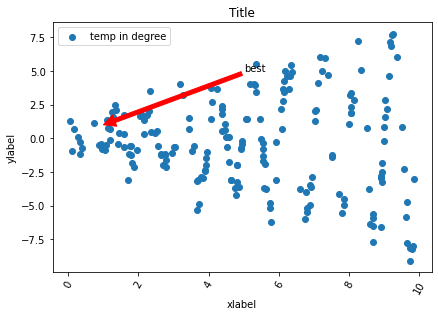

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# font


x = 10*np.random.rand(200,1)
y = (0.2 + 0.8*x) * np.sin(2*np.pi*x) + np.random.randn(200,1) 

plt.scatter(x,y, marker='o', label='temp in degree')

# cutomizing axis
# plt.xlim((-1, 11))
# plt.ylim((-11, 11))
# plt.axis((-1, 11, -11, 11))    # (xmin, xmax, ymin, ymax) 
# plt.axis('equal')              # options(off, equal, square, tight)
plt.tight_layout() # fits data

# Label
plt.xlabel("xlabel")
plt.ylabel("ylabel")
plt.title("Title")
plt.annotate(s='best', xytext=(5,5), xy=(1,1), arrowprops={'color':'red'})
plt.legend(loc="upper left") #option(upper/center/lower left/center/right, best)

# Axes Style
plt.xticks(rotation=60)

# Style
# plt.style.use("ggplot")
# print(plt.style.available)
# fig.savefig("my_figure.png", dpi=300)
plt.show()

## 1.2 Function Syntax

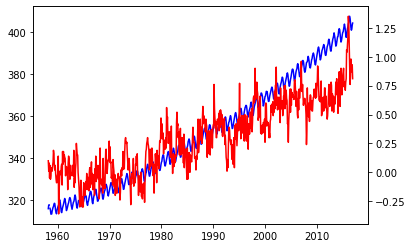

In [23]:
# TWINX
# Initalize a Figure and Axes
fig,ax=plt.subplots()

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change["co2"], color='blue')

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(climate_change.index, climate_change["relative_temp"], color='red')
plt.show()

In [21]:
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

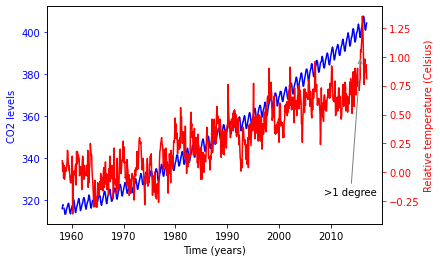

In [26]:
fig, ax = plt.subplots()
plot_timeseries(ax, climate_change.index, climate_change["co2"], 
                "blue", "Time (years)", "CO2 levels")

ax2 = ax.twinx()

plot_timeseries(ax2, climate_change.index, climate_change["relative_temp"], 
                "red", "Time (years)", "Relative temperature (Celsius)")

# annotate
ax2.annotate(">1 degree", 
             xy=(pd.Timestamp('2015-10-06'), 1), 
             xytext=(pd.Timestamp('2008-10-06'), -0.2), 
             arrowprops={'arrowstyle':'->', 'color':'gray'})

plt.show()

## 1.2 Using Axes

In [ ]:
plt.axes([0.1, 0, 0.7, 1]) # with, height
plt.plot(unrate['month'], unrate['temp'])

plt.xlabel('Date')
plt.ylabel('Temperature')


## 1.3 Using Subplot

### 1.3.1 Subplot method 1

In [ ]:
plt.subplot(2, 1, 1) # nrows,ncols,nsubplot
plt.plot(unrate['MONTH'], unrate['VALUE'], 'red')
plt.xlabel('DATE')
plt.title('Temperature') 

plt.subplot(2, 1, 2)
plt.plot(unrate['MONTH'], unrate['VALUE'], 'green')
plt.xlabel('DATE')
plt.title('Dew') 
plt.tight_layout()
plt.show()

### 1.3.2 Subplot method 2

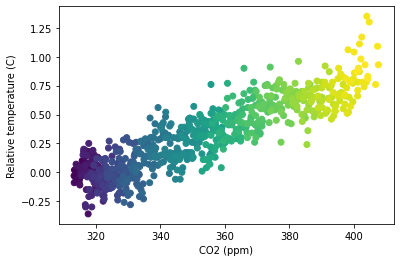

In [28]:
fig, ax = plt.subplots()

# Add data: "co2" on x-axis, "relative_temp" on y-axis
ax.scatter(climate_change["co2"], climate_change["relative_temp"],c=climate_change.index)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("CO2 (ppm)")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Relative temperature (C)")

plt.show()

## Sharing Axes

In [ ]:
fig, ax = plt.subplots()
ax.plot(climate_change.index, climate_change["co2"], color='blue')
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm)', color='blue')
ax.tick_params('y', colors='blue')

ax2 = ax.twinx()

ax2.plot(climate_change.index, climate_change["relative_temp"],
color='red')
ax2.set_ylabel('Relative temperature (Celsius)', color='red')
ax2.tick_params('x', colors='red')
plt.show()

# Experimenting with different plot attributes

In [ ]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
labels = ['1948', '1949', '1950', '1951', '1952']

for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    
    ## if subplot
#     ax = fig.add_subplot(5,1,i+1)
#     ax.plot(x,y, c=color[i],label=labels[i])
    
    # if not
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=labels[i])
    
plt.legend(loc='upper left')
plt.title("Monthly Unemployment Trends")
plt.suptitle("From 1948 to 1952", size=10, y=0.88)
plt.xlabel("Month, Integer")
plt.ylabel("Unemployment Rate, Percent")
plt.show()


# Making into function

In [ ]:
def cfig(x,y,subplot=False):
    fig = plt.figure(figsize=(10,6))
    color =["red", "blue", "green", "orange", "black"]
    labels = ['1948', '1949', '1950', '1951', '1952']
    
    for i in range(5):  
        start_index = i*12
        end_index = (i+1)*12
        subset = unrate[start_index: end_index]
        
        if subplot == True:
            ax = fig.add_subplot(nrows=5,ncols=1, i+1)
            ax.plot(x,y, c=color[i], label=labels[i])
        
        else:
            plt.plot(subset['MONTH'], subset['VALUE'], c=color[i], label=labels[i])
        
    plt.legend(loc='upper left')
    plt.title("Monthly Unemployment Trends, 1948-1952")
    plt.xlabel("Month, Integer")
    plt.ylabel("Unemployment Rate, Percent")
    plt.show()

In [ ]:
cfig(subset['MONTH'], subset['VALUE'],subplot=True)

In [ ]:
cfig(subset['MONTH'], subset['VALUE'])